### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측 
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
 - 지니 지수는 얼마나 불확실한가 ( 얼마나 많은 것들이 섞여있는가)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다 라는 것
 지니계수를 낮추기 위해서 어떻게하면 낮출것인지 기준을 가지고 분리를 하는 것
 
   데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 경우에는 불평등. 
   다양성이 낮을 수록 균일도가 높다는의미로서 1로 갈수록 균일도가 높으므로 지니 계수가 높은 속성을 기준으로 분할
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes



https://injo.tistory.com/15

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state= 156)
# dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state= 156)
dt_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=4,random_state= 156)
# dt_clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=3,random_state= 156)
#pruning(가지치기): 마지막 leaf 노드들이 root 노드까지 


iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,
                                                random_state=11)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
clf_report = classification_report(y_test,pred)
print('결정트리예측정확도',round(accuracy,4))
print('classification report:\n',clf_report)
#target = >0,1,2 붓꽃 품종
#

결정트리예측정확도 0.9333
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



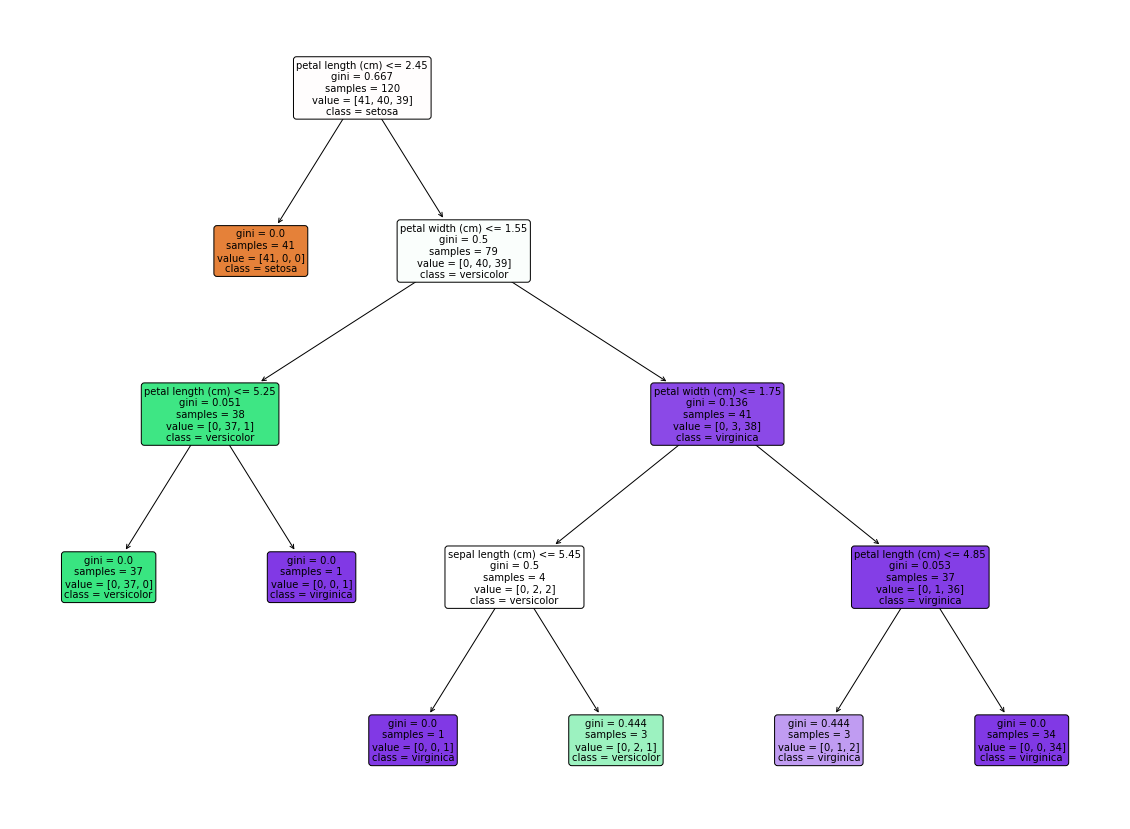

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf,filled=True,feature_names =iris_data.feature_names,class_names = iris_data.target_names,
              rounded =True,fontsize = 10)
plt.show()
plt.close()
#과대적합 우려 있음 하나하나 다 조건을 줘서


feature importance: [0.00862255 0.         0.55679642 0.43458103]
sepal length (cm):0.009
sepal width (cm):0.000
petal length (cm):0.557
petal width (cm):0.435


<AxesSubplot:>

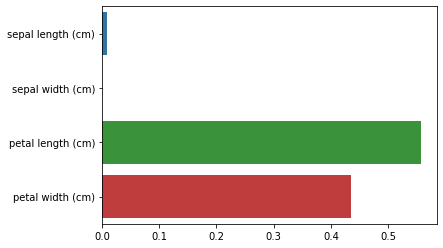

In [15]:
#중요도 보기
import seaborn as sns
import numpy as np

#feature importance 추출
print('feature importance:',dt_clf.feature_importances_)

#feature 별 importance 매핑
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))

#feature importance 를 columns별로 시각화하기
sns.barplot(x= dt_clf.feature_importances_,y=iris_data.feature_names)

설치방법

https://kbj96.tistory.com/26

In [11]:
!pip install Graphviz

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file ='tree.dot',class_names = iris_data.target_names,
               feature_names =iris_data.feature_names,impurity=True,filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

### 결정 트리 실습 - Human Activity Recognition

### [과제]
'dataset/human_activity' 폴더의 데이터들을 불러와서 다음을 수행하세요.
- 학습용 평가용 데이터셋 추출
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

feature_name_df = pd.read_csv('dataset/human_activity/features.txt', sep='\s+', header=None, \
                              names = ['column_index','column_name'])
print(feature_name_df.head())
feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

   column_index        column_name
0             1  tBodyAcc-mean()-X
1             2  tBodyAcc-mean()-Y
2             3  tBodyAcc-mean()-Z
3             4   tBodyAcc-std()-X
4             5   tBodyAcc-std()-Y
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [4]:
feature_df = feature_name_df.groupby('column_name').count()
print(feature_df[feature_df['column_index']>1].count())
feature_df[feature_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index() 
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                             'dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1])
                                                                              if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [6]:
def get_human_dataset():
    feature_name_df = pd.read_csv('dataset/human_activity/features.txt', sep='\s+', header=None, \
                              names = ['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('dataset/human_activity/train/X_train.txt', sep='\s+', header=None)
    X_train.columns = feature_name
    X_test = pd.read_csv('dataset/human_activity/test/X_test.txt', sep='\s+', header=None)
    X_test.columns = feature_name
    
    y_train = pd.read_csv('dataset/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('dataset/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = get_human_dataset()

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [8]:
def get_human_dataset():
    feature_names_df = pd.read_csv('./dataset/human_activity/features.txt',
                              sep='\s+', header=None, names=['column_index','column_name'])
    feature_name = feature_names_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt',
                          sep='\s+',header=None)
    X_train.columns = feature_name
    X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt',
                          sep='\s+',header=None)
    X_test.columns = feature_name
    y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt',
                          sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt',
                          sep='\s+',header=None,names=['action'])
    
    return X_train, X_test, y_train, y_test


In [9]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복시마다 동일한 예측 결과 도출을 위해 random_state 설정

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)

# DecisionTreeCLassifier
print('DecisionTreeClassifier 기본 하이퍼 파라미터:', dt_clf.get_params())

0.8547675602307431
DecisionTreeClassifier 기본 하이퍼 파라미터: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV

params ={
    'max_depth':[6,8,10,12,16,20,24]
}
grid_cv = GridSearchCV(dt_clf,param_grid = params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('최고 평균 정확도수치',grid_cv.best_sccore_)
print('최적 하이퍼 파라미터',grid_cv.best_params_)